## Scenario generation


In [1]:
# import pandas and read "Data/all_dat_merged.csv" into a dataframe
import pandas as pd
df = pd.read_csv("../Data/all_dat_merged.csv")
# check the first 5 rows of the dataframe
print(df.head())
# check the last 5 rows of the dataframe
print(df.tail())
# check the shape of the dataframe
df.shape

                        time     speed  speed_actual  power_actual     power  \
0  2022-05-01 00:00:00+00:00  4.533333      4.684836      0.097912  0.096124   
1  2022-05-01 01:00:00+00:00  4.500000      5.278248      0.140152  0.093615   
2  2022-05-01 02:00:00+00:00  4.516667      5.131543      0.128120  0.094672   
3  2022-05-01 03:00:00+00:00  4.233333      4.793329      0.103879  0.077446   
4  2022-05-01 04:00:00+00:00  4.233333      4.758330      0.101061  0.077504   

   residuals  nominal  forecast  day  hour  bal_price  
0   0.001788   197.56    178.88    1     1      73.99  
1   0.046538   192.20    173.34    1     2      50.04  
2   0.033448   197.43    174.44    1     3      49.53  
3   0.026433   201.32    174.58    1     4      50.07  
4   0.023557   195.00    177.06    1     5      93.39  
                           time     speed  speed_actual  power_actual  \
3571  2022-09-29 19:00:00+00:00  5.683333      7.324427      0.387311   
3572  2022-09-29 20:00:00+00:00  5.75

(3576, 11)

In [2]:
# find index where the column "bal_price" is null
idx = df[df["bal_price"].isnull()].index
df.bal_price[idx] = df.nominal[idx]

/var/folders/f_/09zgsjw54xvfw3k8907hvrnw0000gn/T/ipykernel_63210/3366080027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bal_price[idx] = df.nominal[idx]


In [3]:
# find empirical CDF of power_actual, nominal, and bal_price
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# compute empirical CDF of power_actual
power_actual_sorted = np.sort(df['power_actual'])

# compute empirical CDF of nominal
nominal_sorted = np.sort(df['nominal'])

# compute empirical CDF of bal_price
bal_price_sorted = np.sort(df['bal_price'])



# define lookup function that outputs the CDF value for a given x
def lookup_cdf(x, x_sorted):
    return np.searchsorted(x_sorted, x, side='right') / len(x_sorted)

funECDF_power = interp1d(power_actual_sorted, [lookup_cdf(i,power_actual_sorted) for i in power_actual_sorted],bounds_error = False, fill_value=(0,1), assume_sorted=True)
funECDF_nominal = interp1d(nominal_sorted, [lookup_cdf(i,nominal_sorted) for i in nominal_sorted],bounds_error = False, fill_value=(0,1), assume_sorted=True)
funECDF_bal_price = interp1d(bal_price_sorted, [lookup_cdf(i,bal_price_sorted) for i in bal_price_sorted],bounds_error = False, fill_value=(0,1), assume_sorted=True)

# ECDF
def ecdf_power(x):
    return (funECDF_power(x))

def ecdf_nominal(x):
    return (funECDF_nominal(x))

def ecdf_bal_price(x):
    return (funECDF_bal_price(x))

funIECDF_power = interp1d([lookup_cdf(i,power_actual_sorted) for i in power_actual_sorted], power_actual_sorted,bounds_error = False, fill_value=(min(power_actual_sorted),max(power_actual_sorted)), assume_sorted=True)
funIECDF_nominal = interp1d([lookup_cdf(i,nominal_sorted) for i in nominal_sorted], nominal_sorted,bounds_error = False, fill_value=(min(nominal_sorted),max(nominal_sorted)), assume_sorted=True)
funIECDF_bal_price = interp1d([lookup_cdf(i,bal_price_sorted) for i in bal_price_sorted], bal_price_sorted,bounds_error = False, fill_value=(min(bal_price_sorted),max(bal_price_sorted)), assume_sorted=True)


# inverse ECDF
def iecdf_power(x):
    return (funIECDF_power(x))

def iecdf_nominal(x):
    return (funIECDF_nominal(x))

def iecdf_bal_price(x):
    return (funIECDF_bal_price(x))

    


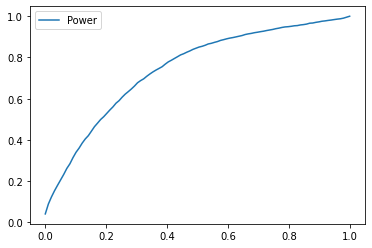

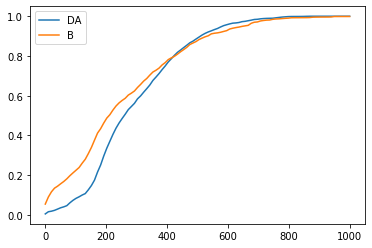

In [4]:
# list of x values to plot from 0 to 1
x = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1000, 100)

# plot the CDFs
plt.plot(x, ecdf_power(x), label='Power')
plt.legend()
plt.show()
# new plot
plt.plot(x2, ecdf_nominal(x2), label='DA')
plt.plot(x2, ecdf_bal_price(x2), label='B')
plt.legend()
plt.show()



In [5]:
# compute the transform of the variables
y_power = ecdf_power(df['power_actual'])
y_nominal = ecdf_nominal(df['nominal'])
y_bal_price = ecdf_bal_price(df['bal_price'])


In [6]:
# all y==0 are set to 0.0001
y_power[y_power == 0] = 0.01
y_nominal[y_nominal == 0] = 0.01
y_bal_price[y_bal_price == 0] = 0.01

# all y==1 are set to 0.9999
y_power[y_power == 1] = 0.99
y_nominal[y_nominal == 1] = 0.99
y_bal_price[y_bal_price == 1] = 0.99


(array([0.00405205, 0.        , 0.00405205, 0.        , 0.00405205,
        0.00405205, 0.00405205, 0.00405205, 0.00810409, 0.00810409,
        0.00810409, 0.01215614, 0.01620818, 0.01215614, 0.02431228,
        0.02026023, 0.02026023, 0.02836432, 0.04457251, 0.04862455,
        0.        , 0.10940524, 0.01620818, 0.12561343, 0.01215614,
        0.        , 0.27148708, 0.10940524, 0.11750933, 0.16613389,
        0.15802979, 0.17423798, 0.2026023 , 0.21070639, 0.22691458,
        0.23907071, 0.25933094, 0.26743504, 0.2998514 , 0.3079555 ,
        0.32011163, 0.33631982, 0.34847596, 0.36063209, 0.37278823,
        0.38089232, 0.38494437, 0.39304846, 0.39710051, 0.38089232,
        0.41736074, 0.39710051, 0.39304846, 0.38494437, 0.36468414,
        0.38899642, 0.35658005, 0.352528  , 0.33631982, 0.32011163,
        0.3079555 , 0.29174731, 0.27553913, 0.2552789 , 0.24312276,
        0.22691458, 0.20665435, 0.19449821, 0.17423798, 0.16208184,
        0.12966547, 0.1499257 , 0.11750933, 0.10

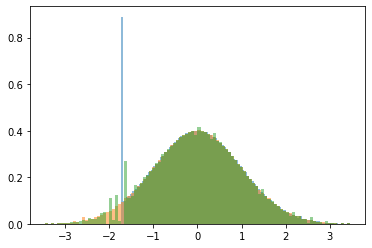

In [7]:
# transform y varialbes to using inverse normal from scipy
from scipy.stats import norm
x_power = norm.ppf(y_power)
x_nominal = norm.ppf(y_nominal)
x_bal_price = norm.ppf(y_bal_price)

# plot the transformed variables
plt.hist(x_power, bins=100, density=True, alpha=0.5, label='Power')
plt.hist(x_nominal, bins=100, density=True, alpha=0.5, label='DA')
plt.hist(x_bal_price, bins=100, density=True, alpha=0.5, label='B')


In [8]:
# Split observations into vectors of length 8
x_power_8 = np.array_split(x_power, len(x_power)/8)
x_nominal_8 = np.array_split(x_nominal, len(x_nominal)/8)
x_bal_price_8 = np.array_split(x_bal_price, len(x_bal_price)/8)


In [9]:
# concatenate the vectors into a matrix
X = np.column_stack((x_power_8, x_nominal_8, x_bal_price_8))


In [10]:
# compute covariance of X (remove observations with nan values)
cov_X = np.cov(X, rowvar=False, ddof=0, aweights=None, fweights=None, bias=False)

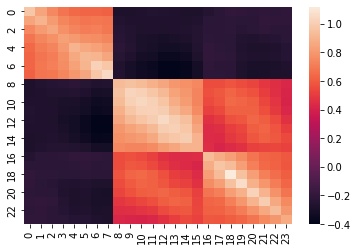

In [11]:
# print covariance matrix as heatmap
import seaborn as sns
sns.heatmap(cov_X, annot=False)
plt.show()



In [13]:
# set seed
np.random.seed(420)

# sample 1000 observations from the multivariate normal distribution
X_sample = np.random.multivariate_normal(np.zeros(24), cov_X, 1000)


In [14]:
# transform the sample back to the original variables
y_power_sample = norm.cdf(X_sample[:,0:8])
y_nominal_sample = norm.cdf(X_sample[:,8:16])
y_bal_price_sample = norm.cdf(X_sample[:,16:24])

In [16]:
# deine list
power_actual_sample = []
nominal_sample = []
bal_price_sample = []

# loop through each row of the sample
for i in range(0, len(y_power_sample)):
    #print(i)
    # inverse CDF of power_actual
    power_actual_sample.append(iecdf_power(y_power_sample[i]))
    # inverse CDF of nominal
    nominal_sample.append(iecdf_nominal(y_nominal_sample[i]))
    # inverse CDF of bal_price
    bal_price_sample.append(iecdf_bal_price(y_bal_price_sample[i]))
    


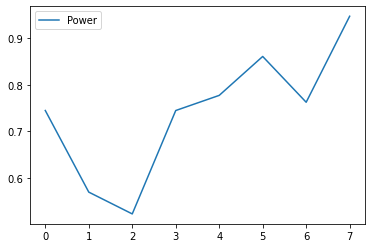

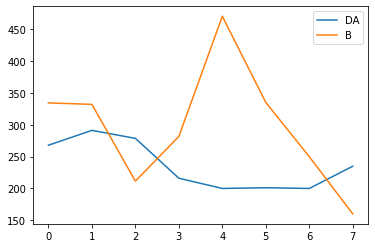

In [17]:
# plot the first sample
plt.plot(power_actual_sample[0], label='Power')
plt.legend()
plt.show()

plt.plot(nominal_sample[0], label='DA')
plt.plot(bal_price_sample[0], label='B')
plt.legend()
plt.show()




In [18]:
# stack all samples into a matrix
X_sample = np.column_stack((nominal_sample, bal_price_sample,power_actual_sample))
X_sample.shape

(1000, 24)

In [19]:
# save the samples to a csv file
np.savetxt("X_sample.csv", X_sample, delimiter=",")

